In [1]:
!pip install perlin-noise ipycanvas

Defaulting to user installation because normal site-packages is not writeable


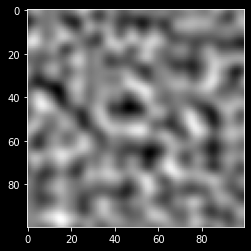

In [2]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=10, seed=1)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()

In [3]:
from ipycanvas import Canvas, hold_canvas
from perlin_noise import PerlinNoise
import time
import math

width = 500
height = 30
canvas = Canvas(width=width, height=height)
display(canvas)

#canvas.fill_circle(250, height / 2, height / 2)

#flipped = False
#lastSign = -1 # 

#t = 0
#dt = 0.001
#n_old = 0

LEFT = -1
STILL = 0
RIGHT = 1

def direction(n_delta, thresh = 0.001):
    # Left
    if n_delta < -thresh:
        return -1
    # Right
    if n_delta > thresh:
        return 1
    # Still
    return 0

def gen_directionV1(tmax, dt, precision = 1):
    noise = PerlinNoise(octaves=4, seed=1)
    
    step_range = range(0, int(tmax / dt))
    t_range = [step * dt for step in step_range]
    dir_list = [None] * len(t_range)
    
    last_x = 0
    last_n = 0
    for i, t in enumerate(t_range):
        with hold_canvas(canvas):
            # Clear display
            canvas.clear()

            # Background
            canvas.fill_style = '#000000'
            canvas.fill_rect(0, 0, width, height)
            canvas.fill_style = '#ffffff'

            n = noise(t / precision)

            n_delta = n - last_n
            last_n = n
            d = direction(n_delta)
            dir_list[i] = d

            if d == STILL:
                x = last_x
            else:
                x = n * width + width / 2
                last_x = x

            canvas.fill_circle(x, height / 2, height / 2)
        time.sleep(dt)
    return dir_list

def gen_directionV2(tmax, dt, precision = 1):
    noise = PerlinNoise(octaves=4, seed=1)
    
    dir_list = []
    
    t = 0
    last_n = 0
    tc_start = time.perf_counter()
    while t < tmax - dt:
        with hold_canvas(canvas):
            n = noise(t / precision)
            t += dt
            
            n_delta = n - last_n
            last_n = n
            d = direction(n_delta)
            dir_list.append(d)
            
            tc = time.perf_counter()
            if tc - tc_start > 0.05:
                # Clear display
                canvas.clear()

                # Background
                canvas.fill_style = '#000000'
                canvas.fill_rect(0, 0, width, height)
                if d == STILL:
                    canvas.fill_style = '#ffff00'
                else:
                    canvas.fill_style = '#ffffff'
                x = n * width + width / 2
                canvas.fill_circle(x, height / 2, height / 2)
                tc_start = tc
        time.sleep(dt)
    return dir_list

def gen_directionV3(tmax, dt, precision = 1):
    # Seed noise generator
    noise = PerlinNoise(octaves=4, seed=1)
    
    # Create a range from 0 to tmax / dt, step size is 1 (default)
    step_range = range(0, int(tmax / dt))
    size = len(step_range)
    
    # Multiply all values in step_range by dt
    t_range = [step * dt for step in step_range]
    
    # Using step_range as an intermediary for creating t_range 
    # prevents "wonky" behaviour from float precisions,
    # it guarantees the correct number of time steps (and size of dir_list)
    
    # Initialize a direction list
    dir_list = [None] * size
    
    i = 0
    last_n = 0
    t_delta_start = time.perf_counter()
    tc_start = time.perf_counter()
    while i < size:
        # Loop freely and only do calculations when we exceed dt
        # this makes things smoother (in theory) than using than stepping
        # This avoids the drift that time.sleep() would cause
        t_check = time.perf_counter()
        if t_check - t_delta_start > dt:
            t_delta_start = t_check
            
            # Calculate noise value from the current time step
            t = t_range[i]
            n = noise(t / precision)

            # Calculate noise delta and direction
            n_delta = n - last_n
            last_n = n
            d = direction(n_delta)
            dir_list[i] = d

            # 20 fps animation, does not affect output data
            # Only used for visualisation
            tc = time.perf_counter()
            if tc - tc_start > 0.05:
                tc_start = tc
                
                # For drawing
                with hold_canvas(canvas):
                    # Clear display
                    canvas.clear()

                    # Background
                    canvas.fill_style = '#000000'
                    canvas.fill_rect(0, 0, width, height)
                    # Change color of circle if the output data says it's standing still
                    if d == STILL:
                        canvas.fill_style = '#ffff00'
                    else:
                        canvas.fill_style = '#ffffff'
                    x = n * width + width / 2
                    canvas.fill_circle(x, height / 2, height / 2)
            i += 1
    return dir_list

class Timer:
    def start(self):
        self.t_last = time.perf_counter()
    
    def reset(self):
        t = time.perf_counter()
        dt = t - self.t_last
        self.start()
        return dt

timer = Timer()
timer.start()
data1 = gen_directionV1(60, 0.01, 9)
print(timer.reset())
data2 = gen_directionV2(60, 0.01, 9)
print(timer.reset())
data3 = gen_directionV3(60, 0.01, 9)
print(timer.reset())

print(len(data1))
print(len(data2))
print(len(data3))

print(data1)
print(data2)
print(data3)

print(data1 == data2)
print(data1 == data3)
print(data2 == data3)


Canvas(height=30, width=500)

67.51026853104122


KeyboardInterrupt: 